In [ ]:
!git clone https://github.com/johnjaniczek/finetune_ESRGAN
%cd finetune_ESRGAN

Cloning into 'finetune_ESRGAN'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 136 (delta 11), reused 11 (delta 11), pack-reused 123
Receiving objects: 100% (136/136), 314.29 MiB | 47.64 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (84/84), done.
/content/finetune_ESRGAN


TEST THIS BY FINETUNING ON DATA FROM FINETUNE_ESRGAN REPO

In [ ]:
!python finetune_remote.py

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:02<00:00, 194MB/s]
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Fine tuning...
epoch: 0, loss: 3.163309
epoch: 1, loss: 3.010224
epoch: 2, loss: 2.910135
epoch: 3, loss: 2.840045
epoch: 4, loss

In [ ]:
%cd finetune_ESRGAN

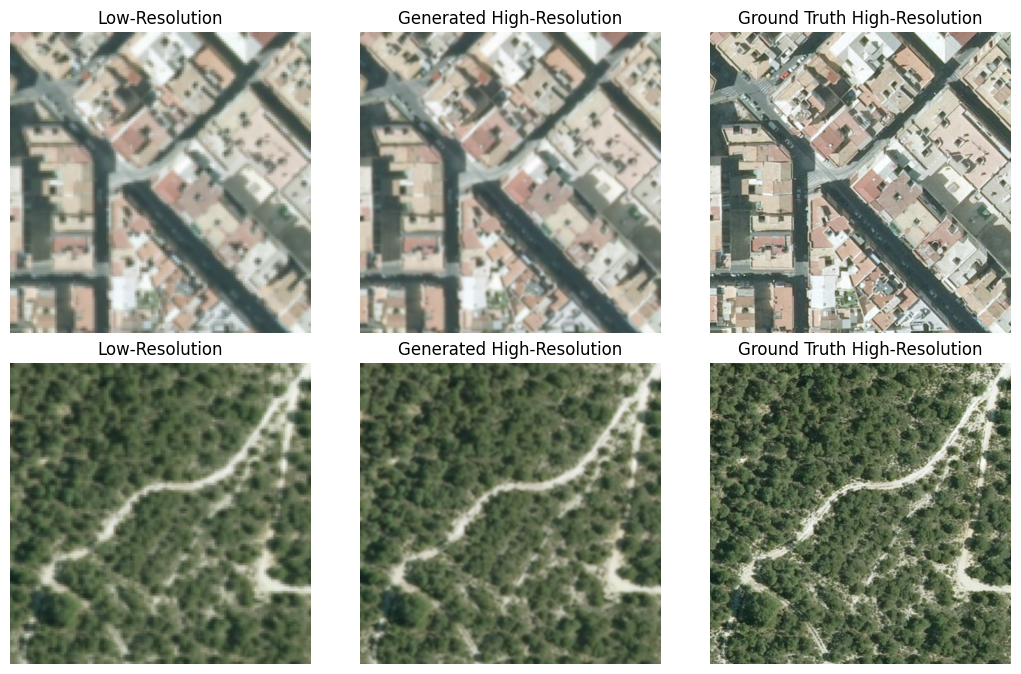

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob

test_LR_folder = 'input/remote_sensing/test/LR/*'
test_HR_folder = 'input/remote_sensing/test/HR/*'
output_folder = "/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/remote_sensing"

lr_paths = sorted(glob(test_LR_folder))
hr_paths = sorted(glob(test_HR_folder))
gen_paths = sorted(glob(os.path.join(output_folder, '*_finetune.png')))

num_images = min(len(lr_paths), len(hr_paths), len(gen_paths))
num_rows = (num_images + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
fig.tight_layout(pad=5)

for i in range(num_images):
    row = i // 3
    col = i % 3

    lr_img = cv2.imread(lr_paths[i])
    lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)
    axes[row, 0].imshow(lr_img)
    axes[row, 0].set_title("Low-Resolution")
    axes[row, 0].axis("off")

    gen_hr_path = next((path for path in gen_paths if os.path.basename(lr_paths[i]).split('.')[0] in path), None)
    if gen_hr_path is not None:
        gen_hr_img = cv2.imread(gen_hr_path)
        gen_hr_img = cv2.cvtColor(gen_hr_img, cv2.COLOR_BGR2RGB)
        axes[row, 1].imshow(gen_hr_img)
        axes[row, 1].set_title("Generated High-Resolution")
        axes[row, 1].axis("off")
    else:
        axes[row, 1].axis("off")

    hr_path = hr_paths[i]
    if hr_path is not None:
        gt_hr_img = cv2.imread(hr_path)
        gt_hr_img = cv2.cvtColor(gt_hr_img, cv2.COLOR_BGR2RGB)
        axes[row, 2].imshow(gt_hr_img)
        axes[row, 2].set_title("Ground Truth High-Resolution")
        axes[row, 2].axis("off")
    else:
        axes[row, 2].axis("off")

base_name = os.path.basename(lr_paths[0]).split('_')[0]
output_path = os.path.join(output_folder, f"{base_name}_comparison.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

NOW FINETUNE ON MY OWN DATA

3


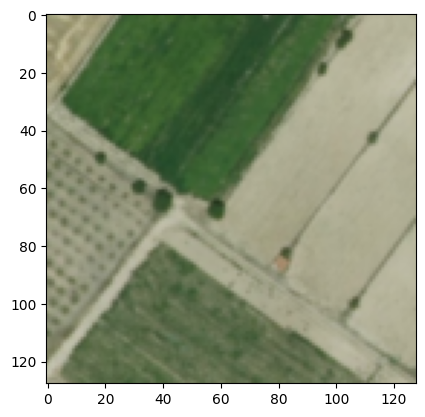

In [ ]:


from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
# dealing with .tif files for first time
dataset = gdal.Open(r"/content/finetune_ESRGAN/input/remote_sensing/train/LR/LR1d.tif")

# add bands
band1 = dataset.GetRasterBand(1)
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

img = np.dstack((b1, b2, b3))
f = plt.figure()
plt.imshow(img)
plt.show()

3


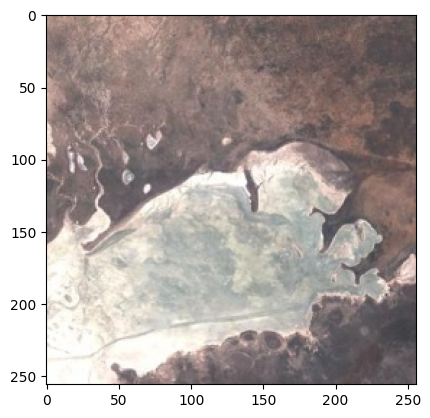

In [ ]:
# visualize my own data now
dataset = gdal.Open(r"/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/LR_tif/S2A_MSIL1C_20240503T084601_N0510_R107_T33KXV_20240503T123113-ql.tif")

print(dataset.RasterCount)

band1 = dataset.GetRasterBand(1)
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)

# Step 4: Read the bands as NumPy arrays
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

# Step 5: Plot the arrays using imshow()
img = np.dstack((b1, b2, b3))
f = plt.figure()
plt.imshow(img)
plt.show()

PROBLEM IS NONE OF MY DATA (.jpg) IS IN WHAT THE MODEL EXPECTS(.tif). SO LETS CHANGE THAT. THIS IS THE CODE BUT LATER ON I CLEANED UP NAMES AND PATHS

HERE I CONVERTED ALL FILES TO .TIF

In [ ]:
%mkdir /content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR_tif

In [ ]:
import os
from PIL import Image

# Specify the input folder containing JPG files
input_folder = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR"

# Specify the output folder for TIFF files
output_folder = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR_tif"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate over all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Open the JPG image
        jpg_path = os.path.join(input_folder, filename)
        image = Image.open(jpg_path)

        # Create the output TIFF path
        tiff_filename = os.path.splitext(filename)[0] + ".tif"
        tiff_path = os.path.join(output_folder, tiff_filename)

        # Save the image as TIFF
        image.save(tiff_path, "TIFF")

print("Conversion completed.")

Conversion completed.


VERIFY CHANGE

In [ ]:
import os

def analyze_file_names(dataset_path):
    train_lr_folder = os.path.join(dataset_path, "train", "LR")
    train_hr_folder = os.path.join(dataset_path, "train", "HR")

    print("Training data:")
    analyze_folder_names(train_lr_folder, train_hr_folder)

    test_lr_folder = os.path.join(dataset_path, "test", "LR")
    test_hr_folder = os.path.join(dataset_path, "test", "HR")

    print("Test data:")
    analyze_folder_names(test_lr_folder, test_hr_folder)

def analyze_folder_names(lr_folder, hr_folder):
    lr_files = os.listdir(lr_folder)
    hr_files = os.listdir(hr_folder)

    print("Low-resolution file names:")
    for file in lr_files:
        print(file)

    print("High-resolution file names:")
    for file in hr_files:
        print(file)

    if len(lr_files) == len(hr_files):
        print("Number of files in both folders is the same.")
    else:
        print("Number of files in both folders is different.")


dir_path = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing"

analyze_file_names(dir_path)

Training data:
Low-resolution file names:
LR15_train.tif
LR18_train.tif
LR3_train.tif
LR1_train.tif
LR16_train.tif
LR11_train.tif
LR2_train.tif
LR12_train.tif
LR10_train.tif
LR14_train.tif
LR19_train.tif
LR9_train.tif
LR22_train.tif
LR7_train.tif
LR21_train.tif
LR20_train.tif
LR6_train.tif
LR8_train.tif
LR17_train.tif
LR5_train.tif
LR4_train.tif
LR13_train.tif
High-resolution file names:
HR15_train.tif
HR18_train.tif
HR3_train.tif
HR1_train.tif
HR16_train.tif
HR11_train.tif
HR2_train.tif
HR12_train.tif
HR10_train.tif
HR14_train.tif
HR19_train.tif
HR9_train.tif
HR22_train.tif
HR7_train.tif
HR21_train.tif
HR20_train.tif
HR6_train.tif
HR8_train.tif
HR17_train.tif
HR5_train.tif
HR4_train.tif
HR13_train.tif
Number of files in both folders is the same.
No common pattern found in file names.
Consistent difference in file names: 
Test data:
Low-resolution file names:
LR2_test.tif
LR3_test.tif
LR1_test.tif
High-resolution file names:
HR2_test.tif
HR3_test.tif
HR1_test.tif
Number of files in bot

In [ ]:
# CLEAN UP
def rename_files(dataset_path):
    train_lr_folder = os.path.join(dataset_path, "train", "LR")
    train_hr_folder = os.path.join(dataset_path, "train", "HR")
    rename_folder(train_lr_folder, train_hr_folder, "train")

    test_lr_folder = os.path.join(dataset_path, "test", "LR")
    test_hr_folder = os.path.join(dataset_path, "test", "HR")
    rename_folder(test_lr_folder, test_hr_folder, "test")

def rename_folder(lr_folder, hr_folder, data_type):
    lr_files = sorted(os.listdir(lr_folder))
    hr_files = sorted(os.listdir(hr_folder))

    for idx, (lr_file, hr_file) in enumerate(zip(lr_files, hr_files), start=1):
        # rename low-res file
        lr_old_path = os.path.join(lr_folder, lr_file)
        lr_new_file_name = f"LR{idx}_{data_type}.tif"
        lr_new_path = os.path.join(lr_folder, lr_new_file_name)
        os.rename(lr_old_path, lr_new_path)

        # rename high-res file
        hr_old_path = os.path.join(hr_folder, hr_file)
        hr_new_file_name = f"HR{idx}_{data_type}.tif"
        hr_new_path = os.path.join(hr_folder, hr_new_file_name)
        os.rename(hr_old_path, hr_new_path)

dir_path = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing"

rename_files(dir_path)

In [ ]:
# CHECK IF IMAGE SIZES ARE CONSISTENT AND WHAT MODEL NEEDS

def check_image_sizes(dataset_path):
    train_lr_folder = os.path.join(dataset_path, "train", "LR")
    train_hr_folder = os.path.join(dataset_path, "train", "HR")
    print("Training images:")
    check_folder_image_sizes(train_lr_folder, "Low-resolution")
    check_folder_image_sizes(train_hr_folder, "High-resolution")

    test_lr_folder = os.path.join(dataset_path, "test", "LR")
    test_hr_folder = os.path.join(dataset_path, "test", "HR")
    print("Test images:")
    check_folder_image_sizes(test_lr_folder, "Low-resolution")
    check_folder_image_sizes(test_hr_folder, "High-resolution")

def check_folder_image_sizes(folder_path, resolution):
    print(f"{resolution} images:")
    image_sizes = set()
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        with Image.open(file_path) as image:
            width, height = image.size
            image_sizes.add((width, height))
    print(f"Unique image sizes: {image_sizes}")
    print()

# Specify the path to your dataset
your_dataset_path = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing"

# Check image sizes in your dataset
check_image_sizes(your_dataset_path)

Training images:
Low-resolution images:
Unique image sizes: {(256, 256)}

High-resolution images:
Unique image sizes: {(512, 512)}

Test images:
Low-resolution images:
Unique image sizes: {(256, 256)}

High-resolution images:
Unique image sizes: {(512, 512)}



In [ ]:
# WHAT IS REPO DATA IN?

dir_path = "input/remote_sensing"

check_image_sizes(dir_path)

Training images:
Low-resolution images:
Unique image sizes: {(128, 128)}

High-resolution images:
Unique image sizes: {(512, 512)}

Test images:
Low-resolution images:
Unique image sizes: {(128, 128)}

High-resolution images:
Unique image sizes: {(512, 512)}



In [ ]:
# MATCH TO THE REPO DATA
def resize_images(folder_path, target_size):
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        with Image.open(file_path) as image:
            resized_image = image.resize(target_size)
            resized_image.save(file_path)

train_lr_folder = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/LR"
test_lr_folder = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/LR"

target_size = (128, 128)
resize_images(train_lr_folder, target_size)
resize_images(test_lr_folder, target_size)

In [ ]:
dir_path = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing"

check_image_sizes(dir_path)

Training images:
Low-resolution images:
Unique image sizes: {(128, 128)}

High-resolution images:
Unique image sizes: {(512, 512)}

Test images:
Low-resolution images:
Unique image sizes: {(128, 128)}

High-resolution images:
Unique image sizes: {(512, 512)}



Modified from finetune_remote.py in git repo.

Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Fine tuning with learning rate: 1e-06
Learning rate: 1e-06, Epoch: 0, Loss: 1.1735613588243723
Learning rate: 1e-06, Epoch: 1, Loss: 1.1696589104831219
Learning rate: 1e-06, Epoch: 2, Loss: 1.1658537592738867
Learning rate: 1e-06, Epoch: 3, Loss: 1.161909220740199
Learning rate: 1e-06, Epoch: 4, Loss: 1.157888213172555
Learning rate: 1e-06, Epoch: 5, Loss: 1.1541902720928192
Learning rate: 1e-06, Epoch: 6, Loss: 1.1506109833717346
Learning rate: 1e-06, Epoch: 7, Loss: 1.1470663528889418
Learning rate: 1e-06, Epoch: 8, Loss: 1.1433817707002163
Learning rate: 1e-06, Epoch: 9, Loss: 1.1398989036679268
Learning rate: 1e-06, Epoch: 10, Loss: 1.136624662205577
Learning rate: 1e-06, Epoch: 11, Loss: 1.1333398278802633
Learning rate: 1e-06, Epoch: 12, Loss: 1.1299240589141846
Learning rate: 1e-06, Epoch: 13, Loss: 1.126599047333002
Learning rate: 1e-06, Epoch: 14, Loss: 1.1234180461615324
Learning rate: 1e-06, Epoch: 15, Loss: 1.120531279593706

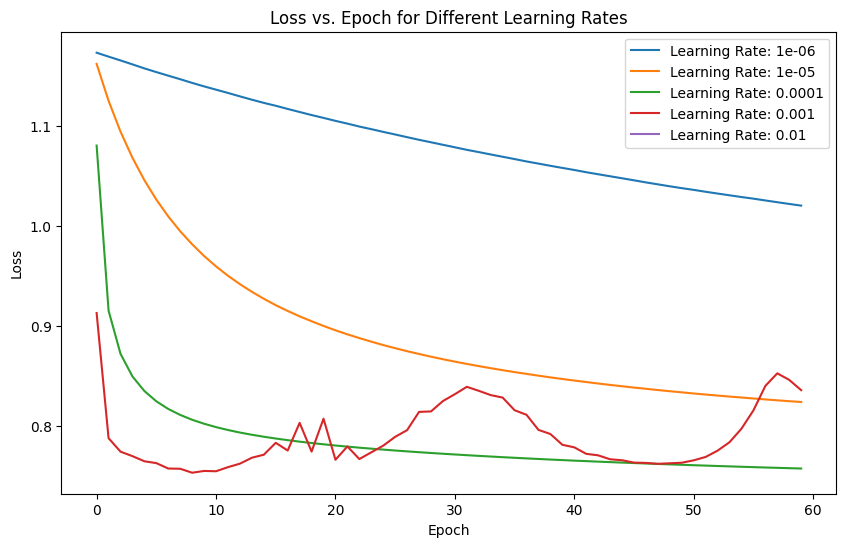

In [ ]:
import sys
import os.path
import glob
import cv2
import numpy as np
import torch
import architecture as arch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim


# hyper parameters
epochs = 60
# test some LRs
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]


model_path = "models/RRDB_ESRGAN_x4.pth"
device = torch.device('cuda')  # if you want to run on CPU, change 'cuda' -> cpu
# device = torch.device('cpu')

# folder for low res and corresponding hi res image
train_LR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/LR/*'
train_HR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/HR/'
test_LR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/LR/*'
test_HR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR/'

# initialize the feature extractor vgg19 model
loss_model = torchvision.models.vgg19(pretrained=True).cuda()
vgg19_54 = nn.Sequential(*list(loss_model.features.children())[:9])
vgg19_22 = nn.Sequential(*list(loss_model.features.children())[:3])


# setup skeleton architecture
model = arch.RRDB_Net(3, 3, 64, 23, gc=32, upscale=4, norm_type=None, act_type='leakyrelu', \
                        mode='CNA', res_scale=1, upsample_mode='upconv')

# load pretrained ESRGAN parameters
model.load_state_dict(torch.load(model_path), strict=True)

model.eval()
for k, v in model.named_parameters():
    v.requires_grad = False
model = model.to(device)
print('Model path {:s}. \nTesting...'.format(model_path))
idx = 0

# iterate through test images
for path in glob.glob(test_LR_folder):
    idx += 1
    base = os.path.splitext(os.path.basename(path))[0]

    # read image
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = img * 1.0 / 255
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
    img_LR = img.unsqueeze(0)
    img_LR = img_LR.to(device)

    # generate HR image
    output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()

    # save generated image to output folder
    output_img = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output_img = (output_img * 255.0).round()
    cv2.imwrite('/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/{:s}_ESRGAN.png'.format(base), output_img)

# switch model to training mode
# model.train()
# for k, v in model.named_parameters():
#     v.requires_grad = True
# model = model.to(device)

# initialize criterion and optimizer
# criterion = nn.MSELoss().cuda()
# optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0)


all_losses = []

for lr in learning_rates:
    print(f"Fine tuning with learning rate: {lr}")

    model.load_state_dict(torch.load(model_path), strict=True)

    model.train()
    for k, v in model.named_parameters():
        v.requires_grad = True
    model = model.to(device)

    # initialize criterion and optimizer
    criterion = nn.MSELoss().cuda()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0)

    losses = []  # Store losses for each epoch

    idx = 0
    running_loss = 0.0
    for epoch in range(epochs):
        optimizer.zero_grad()
        running_loss = 0
        for path in glob.glob(train_LR_folder):
            idx += 1

            # zero the parameter gradients
            base = os.path.splitext(os.path.basename(path))[0]
            # read image
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = img * 1.0 / 255
            img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
            img_LR = img.unsqueeze(0)
            img_LR = img_LR.to(device)
            output = model(img_LR)
            out_feats = vgg19_22(output)

            target_file = train_HR_folder + "HR" + base[2:] + ".tif"
            target_img = cv2.imread(target_file, cv2.IMREAD_COLOR)
            target_img = target_img * 1.0 / 255
            target_img = torch.from_numpy(np.transpose(target_img[:, :, [2, 1, 0]], (2, 0, 1))).float()
            target_img_LR = target_img.unsqueeze(0)
            target_img_LR = target_img_LR.to(device)
            target_feats = vgg19_22(target_img_LR)

            loss = criterion(out_feats, target_feats)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

        # do one gradient step
        print(f"Learning rate: {lr}, Epoch: {epoch}, Loss: {running_loss}")
        losses.append(running_loss)

    all_losses.append(losses)

    # save finetuned model for each learning rate
    model_save_path = f'/content/drive/MyDrive/ESRGAN_finetune/models/RRDB_ESRGAN_remote_finetune_lr_{lr}.pth'
    os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
    torch.save(model.state_dict(), model_save_path)


plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(epochs), all_losses[i], label=f"Learning Rate: {lr}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs. Epoch for Different Learning Rates")
plt.show()


run again with best LR

In [ ]:

import sys
import os.path
import glob
import cv2
import numpy as np
import torch
import architecture as arch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim


# hyper parameters
epochs = 60
lr = 1e-4

# import the pretrained ESRGAN
model_path = "models/RRDB_ESRGAN_x4.pth"
device = torch.device('cuda')  # if you want to run on CPU, change 'cuda' -> cpu
# device = torch.device('cpu')

# folder for low res and corresponding hi res image
train_LR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/LR/*'
train_HR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/HR/'
test_LR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/LR/*'
test_HR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR/'

# initialize the feature extractor vgg19 model
loss_model = torchvision.models.vgg19(pretrained=True).cuda()
vgg19_54 = nn.Sequential(*list(loss_model.features.children())[:9])
vgg19_22 = nn.Sequential(*list(loss_model.features.children())[:3])


# setup skeleton architecture
model = arch.RRDB_Net(3, 3, 64, 23, gc=32, upscale=4, norm_type=None, act_type='leakyrelu', \
                        mode='CNA', res_scale=1, upsample_mode='upconv')

# load pretrained ESRGAN parameters
model.load_state_dict(torch.load(model_path), strict=True)

# save generated images of pre-finetuned model
model.eval()
for k, v in model.named_parameters():
    v.requires_grad = False
model = model.to(device)
print('Model path {:s}. \nTesting...'.format(model_path))
idx = 0

# iterate through test images
for path in glob.glob(test_LR_folder):
    idx += 1
    base = os.path.splitext(os.path.basename(path))[0]

    # read image
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = img * 1.0 / 255
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
    img_LR = img.unsqueeze(0)
    img_LR = img_LR.to(device)

    # generate HR image
    output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()

    # save generated image to output folder
    output_img = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output_img = (output_img * 255.0).round()
    cv2.imwrite('output/remote_sensing/{:s}_ESRGAN.png'.format(base), output_img)

# switch model to training mode
model.train()
for k, v in model.named_parameters():
    v.requires_grad = True
model = model.to(device)

criterion = nn.MSELoss().cuda()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0)


# Fine tune model
print('Model path {:s}. \nFine tuning...'.format(model_path))
idx = 0
running_loss = 0.0
for epoch in range(epochs):
    optimizer.zero_grad()
    running_loss = 0
    for path in glob.glob(train_LR_folder):
        idx += 1

        # zero the parameter gradients
        base = os.path.splitext(os.path.basename(path))[0]
        # read image
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = img * 1.0 / 255
        img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
        img_LR = img.unsqueeze(0)
        img_LR = img_LR.to(device)
        output = model(img_LR)
        out_feats = vgg19_22(output)

        # extract features of target image
        target_file = train_HR_folder + "HR" + base[2:] + ".tif"
        target_img = cv2.imread(target_file, cv2.IMREAD_COLOR)
        target_img = target_img * 1.0 / 255
        target_img = torch.from_numpy(np.transpose(target_img[:, :, [2, 1, 0]], (2, 0, 1))).float()
        target_img_LR = target_img.unsqueeze(0)
        target_img_LR = target_img_LR.to(device)
        target_feats = vgg19_22(target_img_LR)

        # compute loss between output and target
        loss = criterion(out_feats, target_feats)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        # running_loss += loss.item()


    # do one gradient step

    print("epoch: %d, loss: %f" %(epoch, running_loss))




# Test finetuned model by generating new unseen images
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = img2.max()
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))


# switch model to testing mode
model.eval()
for k, v in model.named_parameters():
    v.requires_grad = False
model = model.to(device)
print('Model path {:s}. \nTesting...'.format(model_path))
idx = 0
for path in glob.glob(test_LR_folder):
    idx += 1
    base = os.path.splitext(os.path.basename(path))[0]


    # read image
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = img * 1.0 / 255
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
    img_LR = img.unsqueeze(0)
    img_LR = img_LR.to(device)

    # generate HR image
    output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()

    # save generated image to output folder
    output_img = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output_img = (output_img * 255.0).round()
    cv2.imwrite('/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/{:s}_finetune.png'.format(base), output_img)

# save finetuned model
torch.save(model.state_dict(), f"/content/drive/MyDrive/ESRGAN_finetune/models/RRDB_ESRGAN_remote_finetune_lr_{lr}.pth")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Fine tuning...
epoch: 0, loss: 1.080751
epoch: 1, loss: 0.915714
epoch: 2, loss: 0.872571
epoch: 3, loss: 0.849891
epoch: 4, loss: 0.835317
epoch: 5, loss: 0.825019
epoch: 6, loss: 0.817375
epoch: 7, loss: 0.811418
epoch: 8, loss: 0.806587
epoch: 9, loss: 0.802614
epoch: 10, loss: 0.799243
epoch: 11, loss: 0.796339
epoch: 12, loss: 0.793805
epoch: 13, loss: 0.791601
epoch: 14, loss: 0.789615
epoch: 15, loss: 0.787841
epoch: 16, loss: 0.786199
epoch: 17, loss: 0.784716
epoch: 18, loss: 0.783329
epoch: 19, loss: 0.782062
epoch: 20, loss: 0.780861
epoch: 21, loss: 0.779758
epoch: 22, loss: 0.778680
epoch: 23, loss: 0.777713
epoch: 24, loss: 0.776750
epoch: 25, loss: 0.775849
epoch: 26, loss: 0.774987
epoch: 27, loss: 0.774163
epoch: 28, loss: 0.773369
epoch: 29, loss: 0.772613
epoch: 30, loss: 0.771887
epoch: 31, loss: 0.771173
epoch: 32, loss: 0.770494
epoch: 33, loss: 0.769836
epoch: 34, loss: 0.769

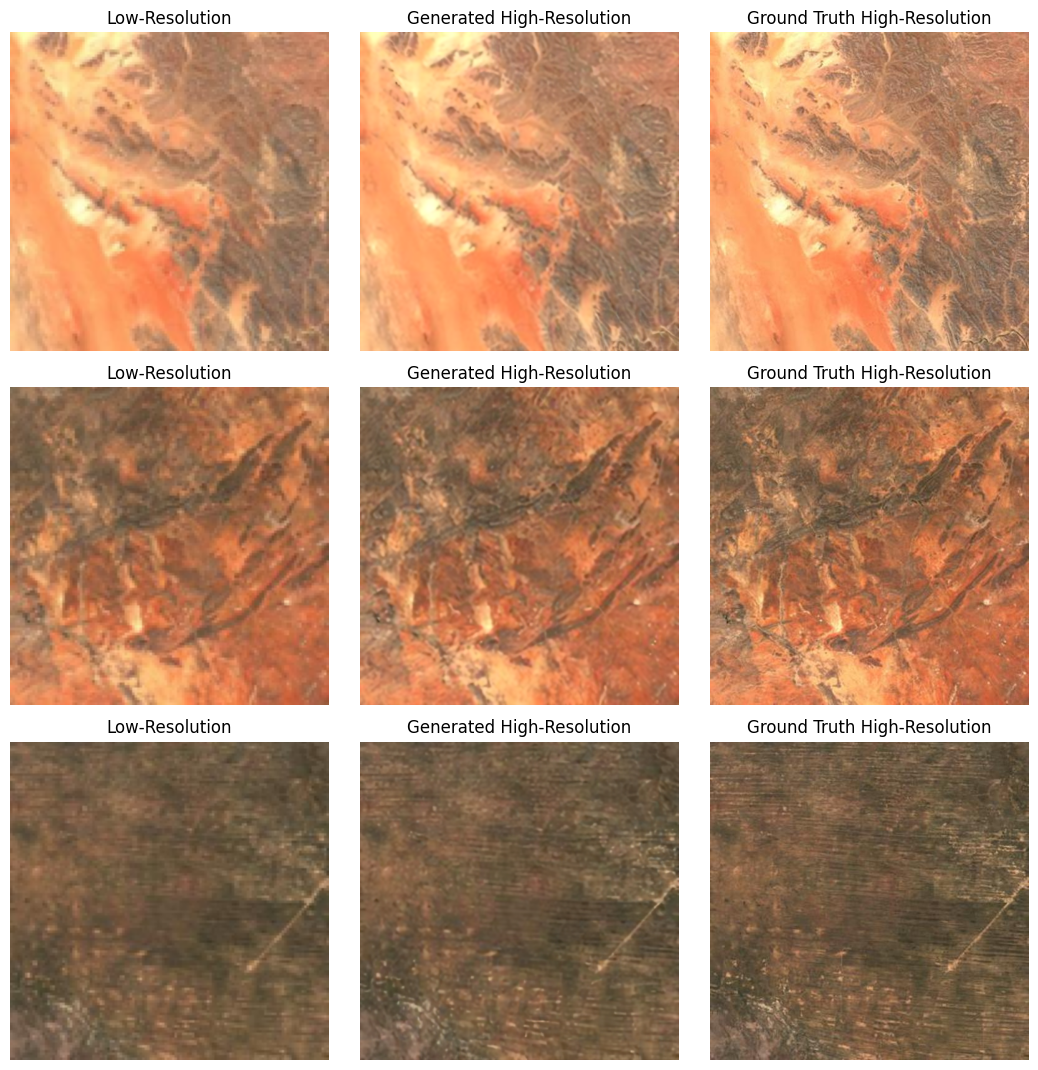

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

test_LR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/LR/*'
test_HR_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR/*'
output_folder = "/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/"

lr_paths = sorted(glob(test_LR_folder))
hr_paths = sorted(glob(test_HR_folder))
gen_paths = sorted(glob(os.path.join(output_folder, '*_finetune.png')))

num_images = min(len(lr_paths), len(hr_paths), len(gen_paths))
num_rows = num_images

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
fig.tight_layout(pad=5)

for i in range(num_images):
    lr_img = cv2.imread(lr_paths[i])
    lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(lr_img)
    axes[i, 0].set_title("Low-Resolution")
    axes[i, 0].axis("off")

    gen_hr_path = next((path for path in gen_paths if os.path.basename(lr_paths[i]).split('.')[0] in path), None)
    if gen_hr_path is not None:
        gen_hr_img = cv2.imread(gen_hr_path)
        gen_hr_img = cv2.cvtColor(gen_hr_img, cv2.COLOR_BGR2RGB)
        axes[i, 1].imshow(gen_hr_img)
        axes[i, 1].set_title("Generated High-Resolution")
        axes[i, 1].axis("off")
    else:
        axes[i, 1].axis("off")

    hr_path = hr_paths[i]
    if hr_path is not None:
        gt_hr_img = cv2.imread(hr_path)
        gt_hr_img = cv2.cvtColor(gt_hr_img, cv2.COLOR_BGR2RGB)
        axes[i, 2].imshow(gt_hr_img)
        axes[i, 2].set_title("Ground Truth High-Resolution")
        axes[i, 2].axis("off")
    else:
        axes[i, 2].axis("off")

base_name = os.path.basename(lr_paths[0]).split('_')[0]
output_path = os.path.join(output_folder, f"{base_name}_comparison.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [ ]:
hr_folder = "/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR"
gen_folder = "/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/"

print("Image names in the HR folder:")
for img_name in os.listdir(hr_folder):
    print(img_name)

print("Image names in the generated folder:")
for img_name in os.listdir(gen_folder):
    print(img_name)

Image names in the HR folder:
HR1_test.tif
HR2_test.tif
HR3_test.tif
Image names in the generated folder:
remote_sensing
LR2_test_ESRGAN.png
LR3_test_ESRGAN.png
LR1_test_ESRGAN.png
LR2_test_finetune.png
LR3_test_finetune.png
LR1_test_finetune.png
LR1_comparison.png


In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

def compare_images(hr_folder, gen_folder):
    hr_img_names = os.listdir(hr_folder)
    psnr_values = []
    ssim_values = []

    for img_name in hr_img_names:
        hr_path = os.path.join(hr_folder, img_name)
        img_HR = cv2.imread(hr_path, cv2.IMREAD_COLOR)

        img_HR_rgb = cv2.cvtColor(img_HR, cv2.COLOR_BGR2RGB)

        _, img_HR_png = cv2.imencode('.png', img_HR_rgb)
        img_HR_png = cv2.imdecode(img_HR_png, cv2.IMREAD_COLOR)

        gen_path = os.path.join(gen_folder, os.path.splitext(img_name)[0].replace("HR", "LR") + "_finetune.png")
        if os.path.isfile(gen_path):
            img_gen = cv2.imread(gen_path, cv2.IMREAD_COLOR)

            img_gen_resized = cv2.resize(img_gen, (img_HR_png.shape[1], img_HR_png.shape[0]), interpolation=cv2.INTER_CUBIC)

            img_gen_resized_rgb = cv2.cvtColor(img_gen_resized, cv2.COLOR_BGR2RGB)

            # Calculate metrics
            psnr = peak_signal_noise_ratio(img_HR_png, img_gen_resized_rgb)
            psnr_values.append(psnr)

            ssim = structural_similarity(img_HR_png, img_gen_resized_rgb, channel_axis=2)
            ssim_values.append(ssim)


    avg_psnr = np.mean(psnr_values) if psnr_values else float('nan')
    avg_ssim = np.mean(ssim_values) if ssim_values else float('nan')

    print(f"Average PSNR: {avg_psnr:.2f} dB")
    print(f"Average SSIM: {avg_ssim:.4f}")

hr_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR/'
gen_folder = "/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/"

compare_images(hr_folder, gen_folder)

Average PSNR: 31.14 dB
Average SSIM: 0.8061
